<a href="https://colab.research.google.com/github/SGRGit/gwOsc/blob/FinalCode/DataPrepForBlipGlitchClassification_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

In [0]:
import gwpy
import numpy as np
import matplotlib.pyplot as plt
import math

****Analysis with LIGO data for Glitch Recognition using Q-Transforms****

In [0]:
#Import Blip Glitch o1 Data from gspy in Pandas Dataframe
import pandas as pd
raw_data = pd.read_csv("/content/gdrive/My Drive/gspy_blip_o1.csv")

glitch_data = raw_data[['GPStime','ifo', 'peakFreq', 'snr', 'amplitude', 'centralFreq','duration']]

In [0]:
import os
base_dir = "gdrive/My Drive/Colab Notebooks/GlitchNoiseClassification/"
seta = 'Glitch'
setb = 'Noise'

data_dir = os.path.join(base_dir, 'Data')
seta_data_dir = os.path.join(data_dir, seta)
seta_data_fnnames = os.listdir(seta_data_dir)

setb_data_dir = os.path.join(data_dir, setb)
setb_data_fnnames = os.listdir(setb_data_dir)

In [0]:
glitch_data_cln =  glitch_data.iloc[460 : ]

In [0]:
glitch_data_cln.reset_index(inplace = True)

In [85]:
glitch_data_cln

,index,GPStime,ifo,peakFreq,snr,amplitude,centralFreq,duration
0,460,1.133913e+09,L1,170.654,26.020,2.540000e-22,370.211,0.250
1,461,1.129047e+09,L1,225.349,8.792,1.060000e-22,313.670,0.016
2,462,1.132810e+09,L1,137.711,29.714,2.750000e-22,298.747,0.375
3,463,1.133160e+09,L1,170.654,10.456,1.000000e-22,384.261,0.188
4,464,1.133455e+09,H1,262.065,12.123,1.920000e-22,303.810,0.039
...,...,...,...,...,...,...,...,...
2655,3115,1.127063e+09,H1,180.507,8.031,1.070000e-22,222.291,0.125
2656,3116,1.128756e+09,H1,312.908,8.195,1.010000e-22,312.274,0.344
2657,3117,1.128127e+09,H1,53.485,8.049,1.140000e-21,83.413,0.094
2658,3118,1.134499e+09,L1,211.477,9.123,8.990000e-23,578.150,0.023


In [35]:
import os
files = os.listdir(seta_data_dir)
len(files)

500

In [86]:
import time
from gwpy.timeseries import TimeSeries
epoch_noise = np.empty(1001)
ifo_noise = []
images_noise = []

for i in range(0, 1001, 1):
  epoch_noise[i] = int(glitch_data_cln['GPStime'][i])
  ifo_noise.append(glitch_data_cln['ifo'][i])
#print(ifo_noise, epoch_noise)

for a in range(0, 1001, 1):
  print(a)
  I = TimeSeries.fetch_open_data(ifo_noise[a], epoch_noise[a]-4, epoch_noise[a]-1).q_transform()
  images_noise.append(I)
  fig, ax = plt.subplots(1, 1, figsize = (10, 5))
  ax.imshow(I)
  ax.set_xscale('seconds')
  ax.set_yscale('log')
  ax.set_ylabel('Frequency [Hz]')
  ax.grid(True, axis='y', which='both')
  ax.colorbar(cmap='viridis', label='Normalized energy')
  ax.set_title('Q-Transform for Noise at %s on GPS %d' %(ifo_noise[a], epoch_noise[a]))
  plt.savefig(os.path.join(setb_data_dir,'Q-Transform for Noise at %s on GPS %d' %(ifo_noise[a], epoch_noise[a])))
  plt.close()
  time.sleep(0.1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


UnboundLocalError: ignored

In [13]:
len(images_noise)

94

['L1', 'H1', 'H1'] [1.12719863e+09 1.13221326e+09 1.13620620e+09] [0.888 0.375 0.681]


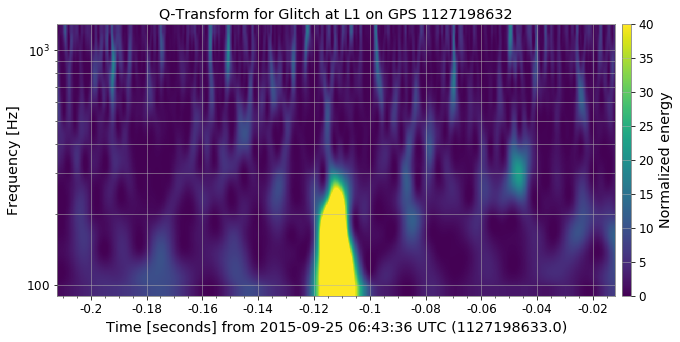

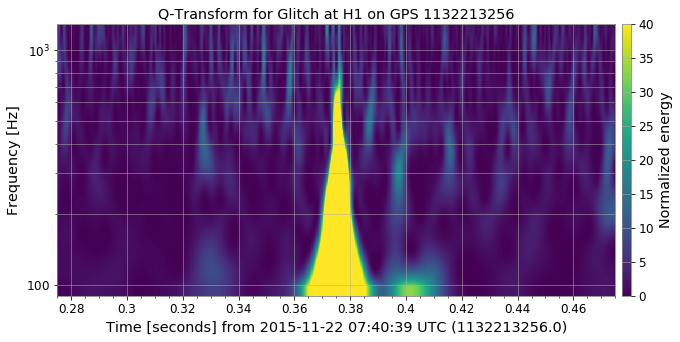

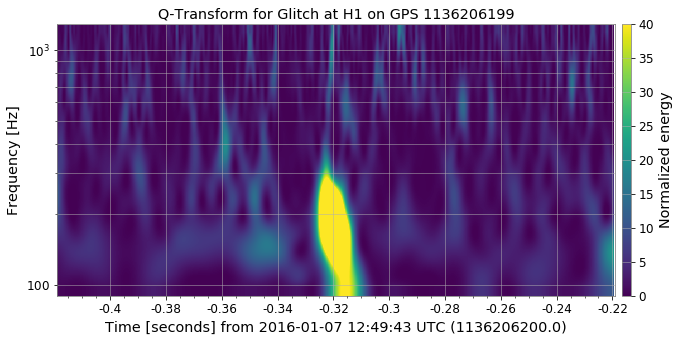

In [7]:
import time
from gwpy.timeseries import TimeSeries
epoch_glitch= np.empty(1001)
ifo_glitch = []
interval = np.empty(1001)
images_glitch = []

for i in range(0, 1001, 1):
  epoch_glitch[i] = int(glitch_data['GPStime'][i])
  ifo_glitch.append(glitch_data['ifo'][i])
  interval[i] = round((glitch_data['GPStime'][i] %1), 3)
print(ifo_glitch, epoch_glitch, interval)

for a in range(0, 1001, 1):
  I = TimeSeries.fetch_open_data(ifo_glitch[a], epoch_glitch[a]-2, epoch_glitch[a]+2).q_transform(outseg = (epoch_glitch[a]+interval[a]-0.1 , epoch_glitch[a] +interval[a]+ 0.1))
  images_glitch.append(I)
  fig, ax = plt.subplots(1, 1, figsize = (10, 5))
  ax = plt.gca()
  ax.imshow(I)
  #ax.set_epoch(epoch_glitch[a])
  ax.set_xscale('seconds')
  ax.set_yscale('log')
  ax.set_ylabel('Frequency [Hz]')
  ax.grid(True, axis='y', which='both')
  ax.colorbar(cmap='viridis', label='Normalized energy', clim=[0, 40])
  ax.set_title('Q-Transform for Glitch at %s on GPS %d' %(ifo_glitch[a], epoch_glitch[a]))
  plt.savefig(os.path.join(seta_data_dir,'Q-Transform for Glitch at %s on GPS %d' %(ifo_noise[a], epoch_noise[a])))
  plt.close()
  time.sleep(0.01)